In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pysentani as sti

In [2]:
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')

In [3]:
# pysentani access type function
survey['access_type'] = sti.access_type(survey)


In [4]:
# selecting only demand points that are households
survey = survey[survey['demand_point'] == 'household']

In [5]:
# renaming columns
survey.rename(columns={'app_now/rice_cooker': 'Rice Cooker',
                       'app_now/TV': 'TV',
                       'app_now/fridge': 'Fridge',
                       'app_now/fan':'Fan',
                       'app_now/lighting': 'Lighting',
                       'app_now/radio': 'Radio',
                       'HP_y_n': 'Mobile Phone',
                       'access_type': 'Access Type'},
                                 inplace = True)

# renaming subcategories of Access Type
survey.replace(to_replace = {'Access Type': {'PLN_grid': 'PLN Grid',
                                             'community_microgrid': 'Community Microgrid',
                                             'PLN_microgrid': 'PLN Microgrid',
                                             'no_access': 'No Access'}},inplace = True)

In [6]:
# creating new dataframe that classifies each owned appliance by access type
subsurvey = survey[['Access Type',
                    'TV','Lighting','Mobile Phone','Radio',
                    'Rice Cooker','Fridge','Fan']]

In [7]:
# grouping new dataframe of appliances into specific access types
analyzed = subsurvey.groupby('Access Type').mean()
analyzed.transpose()

Access Type,Community Microgrid,No Access,PLN Grid,PLN Microgrid
TV,0.941176,0.817073,0.815238,0.840000
Lighting,0.882353,0.898374,0.927619,0.960000
Mobile Phone,0.843137,0.756579,0.686924,0.774194
Radio,0.509804,0.447154,0.318095,0.293333
Rice Cooker,0.137255,0.032520,0.278095,0.013333
Fridge,0.019608,0.016260,0.306667,0.040000
Fan,0.098039,0.081301,0.144762,0.026667


In [8]:
# creating variables for barplot graph
analyzed['Access Type'] = analyzed.index
melted = pd.melt(analyzed, 
                 id_vars=['Access Type'],
                 value_vars=['TV','Lighting','Mobile Phone','Radio',
                             'Rice Cooker','Fridge','Fan'],
                 value_name='Percent Ownership')

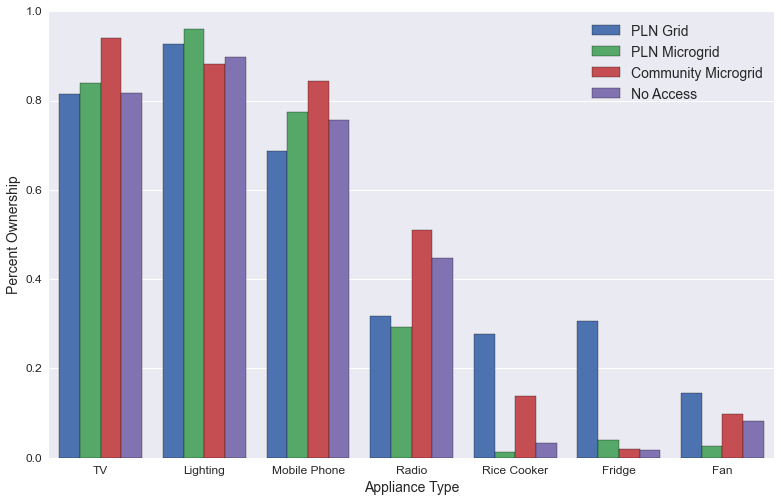

In [9]:
plt.figure(figsize=(13,8))
sns.barplot(x='variable', y='Percent Ownership', hue='Access Type',
            hue_order = ['PLN Grid','PLN Microgrid','Community Microgrid','No Access'],
            saturation=5, data=melted)
plt.legend(loc='upper right',prop={'size':14})
plt.xlabel('Appliance Type', fontsize=14)
plt.ylabel('Percent Ownership', fontsize=14)
plt.tick_params(labelsize=12)
plt.savefig('2015_10_15_ownership_graph.pdf')